### Machine learning : Artifical neural network (ANN) from Scrath

In [199]:
#Import the libraries
import sys, os
import numpy as np
import pandas as pd

### 1.1 Let's get and load the data. 

In [200]:
#Load the data set
df=pd.read_csv('calo_shower_data.csv')

In [201]:
#The first elements of the data set
df.head()

,shower_depth,shower_width,type
0,102.726547,41.060509,hadron
1,55.953644,19.107106,electron
2,76.237938,21.859595,electron
3,145.829765,18.478401,hadron
4,151.974596,33.539821,hadron


In [230]:
#The columns of the data set
df.columns

Index(['shower_depth', 'shower_width', 'type', 'shower_depth_scaled',
       'shower_width_scaled', 'x0', 'y'],
      dtype='object')

The columns are :  shower_depth, shower_width, type , the columns that stores the labels (targets) is type

### 1.2 The number of samples are 

In [231]:
# the number of samples are 
df.shape

(100000, 7)

### 2.2 Standarization 
Let's create for each input feature an extra column in the dataframe to rescale it to a distribution of zero-mean and unit-variance. To see statistical information on a dataframe, a convenient method is:

In [219]:
df.describe()

,shower_depth,shower_width,shower_depth_scaled,shower_width_scaled,x0,y
count,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.0,100000.000000
mean,99.847703,25.060322,-2.048417e-14,3.273701e-14,1.0,0.500000
std,31.360512,9.073636,1.000000e+00,1.000000e+00,0.0,0.500003
min,0.013479,0.139829,-3.183437e+00,-2.746473e+00,1.0,0.000000
25%,80.005289,18.726105,-6.327197e-01,-6.980902e-01,1.0,0.000000
50%,97.648121,22.890813,-7.013857e-02,-2.391003e-01,1.0,0.500000
75%,121.048161,30.209608,6.760240e-01,5.674998e-01,1.0,1.000000
max,222.651768,73.082693,3.915882e+00,5.292517e+00,1.0,1.000000


In [220]:
MEAN_X1  =df.describe()['shower_depth']['mean']
SIGMA_X1 =df.describe()['shower_depth']['std']
MEAN_X2  =df.describe()['shower_width']['mean']
SIGMA_X2 =df.describe()['shower_width']['std']

df['shower_depth_scaled'] = (df['shower_depth']-MEAN_X1)/SIGMA_X1
df['shower_width_scaled'] = (df['shower_width']-MEAN_X2)/SIGMA_X2

In [224]:
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0,y
0,102.726547,41.060509,hadron,0.091798,1.763371,1,0
1,55.953644,19.107106,electron,-1.399660,-0.656100,1,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1,0
4,151.974596,33.539821,hadron,1.662182,0.934520,1,0


### 3.1 Adding x0 column 
Add a column x0 to the dataframe df filled entirely with ones.

In [207]:
df['x0']=1

In [232]:
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0,y
0,102.726547,41.060509,hadron,0.091798,1.763371,1,0
1,55.953644,19.107106,electron,-1.399660,-0.656100,1,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1,0
4,151.974596,33.539821,hadron,1.662182,0.934520,1,0


###  3.2 Matrix X 
Let's create a new dataframe X that contain the x0 column and the columns of the two scaled input features.

In [209]:
X=df[['x0','shower_depth_scaled','shower_width_scaled']]

In [226]:
X.head()

,x0,shower_depth_scaled,shower_width_scaled
0,1,0.091798,1.763371
1,1,-1.399660,-0.656100
2,1,-0.752850,-0.352750
3,1,1.466241,-0.725390
4,1,1.662182,0.934520


### 3.3 Labels to binary
The target column contains alphabetical labels. Let's create an extra column in your dataframe called y containing 1 if the sample is an electron shower and 0 if it is a hadron one.

In [227]:
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0,y
0,102.726547,41.060509,hadron,0.091798,1.763371,1,0
1,55.953644,19.107106,electron,-1.399660,-0.656100,1,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1,0
4,151.974596,33.539821,hadron,1.662182,0.934520,1,0


In [212]:
df['y']=0

In [213]:
df.loc[ df["type"]=="electron","y" ]=1

In [229]:
df.head()

,shower_depth,shower_width,type,shower_depth_scaled,shower_width_scaled,x0,y
0,102.726547,41.060509,hadron,0.091798,1.763371,1,0
1,55.953644,19.107106,electron,-1.399660,-0.656100,1,1
2,76.237938,21.859595,electron,-0.752850,-0.352750,1,1
3,145.829765,18.478401,hadron,1.466241,-0.725390,1,0
4,151.974596,33.539821,hadron,1.662182,0.934520,1,0


### 3.4 Vector y
Extract from the dataframe this y column with the binary labels in a separate dataframe y.

In [215]:
y=df['y']

4. DataFrames to Numpy

In [216]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split( X, y, test_size=0.2, random_state=42)

X_train = X_train_df.to_numpy() ; y_train = y_train_df.to_numpy()
X_test  = X_test_df.to_numpy()  ; y_test  = y_test_df.to_numpy()

In [217]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((80000, 3), (80000,), (20000, 3), (20000,))

The  dataset is divided in 80\% training set and and 20\% in test set.

4.2 Test size
Looking at the shapes, explain what test_size represents.

The test_size=0.2,  represent the 20\% of the data taking for the testing data set.

The number of tes

### 5. Useful Functions

#### 5.1 Linear Sum

In [234]:
#The function of the linear model
def lin_sum(X, thetas):
    return np.sum(X*thetas)

#### 5.2 Logistic Function
Let's write a function computing the logistic function:

In [235]:
#the logistic function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#### 5.3 Hypothesis Function
Using the two functions above, write the hypothesis function 


In [236]:

#the hypothesis function 
def h_class(X, thetas):
    z = np.dot(X, thetas)
    return sigmoid(z)

#### 5.4 Partial Derivatives of Cross-Entropy Cost Function

In [237]:
#Partial Derivatives of Cross-Entropy Cost Function
def derivatives_cross_entropy(y_preds, y_obs, x_feature):

    sum_deriv_J_theta = np.dot((y_preds-y_obs),x_feature)
   
    return sum_deriv_J_theta/len(x_feature)

#### 5.5 Cross-Entropy Cost Function
Let's write a function computing the total cost from the 2D column vectors of predictions and observations:


In [239]:
# Cross-Entropy Cost Function

def cross_entropy_cost(y_vals, y_preds):
   
    cost_function_1 = np.dot(y_vals, np.log(y_preds))
    cost_function_2 = np.dot((1-y_vals), np.log(1-y_preds))
   
    return -(cost_function_1+cost_function_2)/len(y_vals)

5

### 6. Classifier

In [240]:
# Hyperparameters
alpha = 0.1# ...
N =  500 # ... epochs

# Number of features + 1 (number of columns in X)
n = X_train.shape[1] # we have n = 3 ...

# Initialization of theta *row vector*
thetas = np.random.random((3,1))

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []

print("Starting gradient descent\n")

# -------------------
#   Start iterations
# -------------------
for i in range(1, N+1):
    # Get predictions (hypothesis function)
    y_preds = h_class(X_train, thetas)
    y_preds_test = h_class(X_test, thetas)

    # Calculate and store costs with train and test datasets
    J_train = cross_entropy_cost(y_train, y_preds); costs_train.append(J_train)
    J_test  = cross_entropy_cost(y_test, y_preds_test); costs_test.append(J_test)

    # Get partial derivatives d/dTheta_j
    dJ_thetas = np.zeros(shape=(3, 1))
    for j in range(3):
        dJ_thetas[j,0] = derivatives_cross_entropy(np.transpose(y_preds), y_train, X_train[:, j])

      # Calculate new theta parameters:
    thetas_new = thetas - alpha*dJ_thetas

    # Update the parameters for the next iteration
    thetas = thetas_new

    # --------------------
    #  P R I N T O U T S
    # --------------------
    # Every 10 iterations and n > 100 every 100 iterations
    if (i<100 and i % 10 == 0) or (i>100 and i % 100 == 0):
        print('[%d]\tt0 = %4.4f  t1 = %4.4f  t2 = %4.4f  Cost = %4.8f  dJ0 = %4.4f  dJ1 = %4.4f  dJ2 = %4.4f' %
         ( i,   thetas[0,0], thetas[1,0], thetas[1,0],   J_train,  dJ_thetas[0,0],   dJ_thetas[1,0],   dJ_thetas[2,0]))

print(f'\nEnd of gradient descent after {i} iterations')

print('Optimized thetas:')
print(f'Theta 0 = {thetas[0,0]:.4f}, Theta 1 = {thetas[1,0]:.4f}, Theta 2 = {thetas[2,0]:.4f}')

Starting gradient descent

[10]	t0 = 0.6008  t1 = -0.0362  t2 = -0.0362  Cost = 0.73916906  dJ0 = 0.1487  dJ1 = 0.3219  dJ2 = 0.2781
[20]	t0 = 0.4716  t1 = -0.3094  t2 = -0.3094  Cost = 0.58575680  dJ0 = 0.1136  dJ1 = 0.2378  dJ2 = 0.1981
[30]	t0 = 0.3741  t1 = -0.5145  t2 = -0.5145  Cost = 0.50234266  dJ0 = 0.0857  dJ1 = 0.1820  dJ2 = 0.1451
[40]	t0 = 0.2996  t1 = -0.6754  t2 = -0.6754  Cost = 0.45314803  dJ0 = 0.0665  dJ1 = 0.1459  dJ2 = 0.1120
[50]	t0 = 0.2408  t1 = -0.8071  t2 = -0.8071  Cost = 0.42141241  dJ0 = 0.0533  dJ1 = 0.1215  dJ2 = 0.0903
[60]	t0 = 0.1929  t1 = -0.9186  t2 = -0.9186  Cost = 0.39944507  dJ0 = 0.0438  dJ1 = 0.1040  dJ2 = 0.0753
[70]	t0 = 0.1532  t1 = -1.0150  t2 = -1.0150  Cost = 0.38341751  dJ0 = 0.0368  dJ1 = 0.0908  dJ2 = 0.0644
[80]	t0 = 0.1194  t1 = -1.1000  t2 = -1.1000  Cost = 0.37125010  dJ0 = 0.0315  dJ1 = 0.0806  dJ2 = 0.0561
[90]	t0 = 0.0903  t1 = -1.1759  t2 = -1.1759  Cost = 0.36172603  dJ0 = 0.0273  dJ1 = 0.0724  dJ2 = 0.0495
[200]	t0 = -0.0850 

#### 7. Plot cost versus epochs
Let's use the following macro to plot the variation of the total cost vs the iteration number:

In [241]:
def plot_cost_vs_iter(train_costs, test_costs, title="Gradient Descent: Cost evolution"):
  
  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_costs)+1)

  ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
  ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')

  ax.set_xlabel("Number of iterations")
  ax.set_ylabel(r"Cost $J(\theta)$", rotation="horizontal")
  ax.yaxis.set_label_coords(-0.2, 0.5)

  ax.legend(loc="upper right", frameon=False)
  ax.set_title(title, fontsize=20, pad=22)
  plt.show()

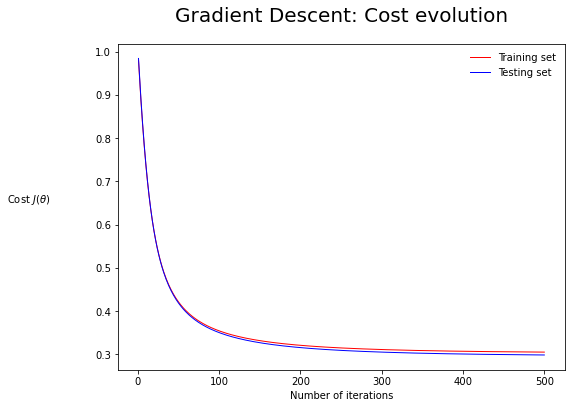

In [242]:
plot_cost_vs_iter(costs_train, costs_test)

#### 7.1: Let's describe the plot and give  the fundamental difference between the two series train and test

This plot show the variation of the cost function on trainig data and testing data set. It's show that the curve of the cost function decrease with the number of iterations and we see that before 100 iterations the value of the cost function are the same but at a certain iterations the begin to differentiate but still parallel and convert to a similarlie and sames values 

#### 7.2: What would it mean if there would be a bigger gap between the test and training values of the cost?

A gap between training and test costs mean  that the model's performance on the training set may not reflect its effectiveness on new, unseen data. It could be explain by the case of :

Overfitting when the model becomes overly complex, tailoring itself excessively to training data intricacies, noise, and outliers. This leads to a continuous decrease in training cost, but a rise or consistently higher test cost, indicating potential struggles with generalization to new, unseen data.

Underfitting when the model lacks the capacity to learn from training data, resulting in suboptimal performance on both training and test sets.

Data mismatch arises when a significant dissimilarity exists between the distributions of training and test data. If the test set represents a different distribution, the model may face challenges in effective generalization, leading to suboptimal performance on new, unseen data.



### 8. Performance

In [243]:
#The functions to make predictions

def make_predictions(thetas, X, y, boundary=0.5):

  bin_preds = [1 if value > boundary else 0 for value in h_class(X, np.array(thetas))[:,0] ] 

  return bin_preds

In [244]:
preds = make_predictions(thetas, X_test, y_test, 0.5)

In [245]:
# Turn y_test into 1D array:
obs_test = y_test #[:,0]

#### 8.1 Accuracy

In [246]:
#The function to get the accuracy of the model
def get_accuracy(obs_values, pred_values):
  
    # Ensure both arrays have the same length
    if len(obs_values) != len(pred_values):
        raise ValueError("Arrays must have the same length.")

    # Calculate the number of correct predictions
    correct_predictions = np.sum(obs_values == pred_values)
    

    # Calculate accuracy
    accuracy = correct_predictions / len(obs_values)

    return accuracy

In [247]:
print(get_accuracy(obs_test, preds))

0.8818


Accuracy (0.8818) is the ratio of correctly predicted instances to the total instances. It mean that approximately 88.18% of the predictions are correct.
A high accuracy score suggests that your model is performing well in terms of overall correctness.

#### 8.2 Recall

In [252]:
#The get  recall function
def get_recall(obs_values, pred_values):
   
    True_positives = sum(obs == 1 and pred == 1 for obs, pred in zip(obs_values, pred_values))
   
    Actual_positives = sum(obs == 1 for obs in obs_values)
   
    recall = True_positives / Actual_positives
   
    return recall


In [253]:
get_recall(obs_test, preds)

0.9116288411327576

Recall (0.911427), also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to the total actual positives.
It's approximately 91.14% of the actual positive instances are correctly identified by the model.
In the context this case , high recall value indicates that the model is effective at capturing most of the positive instances, minimizing the chances of missing relevant cases.